# Ford GoBike Rides in 2018
## by Reema Mohsin

## Preliminary Wrangling

> This data presents individual bike rides from the GoBike system in the San Francisco Bay Area. My analysis will be conducted on all rides in 2018. 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [4]:
#list of all 2018 files
datafiles = ['201801-fordgobike-tripdata.csv',"201802-fordgobike-tripdata.csv",
            "201803-fordgobike-tripdata.csv","201804-fordgobike-tripdata.csv",
            "201805-fordgobike-tripdata.csv","201806-fordgobike-tripdata.csv",
            "201807-fordgobike-tripdata.csv","201808-fordgobike-tripdata.csv",
            "201809-fordgobike-tripdata.csv","201810-fordgobike-tripdata.csv",
            "201811-fordgobike-tripdata.csv","201812-fordgobike-tripdata.csv"]

df = pd.DataFrame()
#read all files into a df
for file in datafiles:
    if df.empty:
        df = pd.read_csv(file)
    else:
        df1 = pd.read_csv(file)
        df = pd.concat([df,df1],ignore_index=True)
        
    #keep track of rows on each iteration
    print("Number of rows in df: {} after loading {}".format(df.shape[0],file))
    
df.reset_index(drop=True, inplace=True)

Number of rows in df: 94802 after loading 201801-fordgobike-tripdata.csv
Number of rows in df: 201520 after loading 201802-fordgobike-tripdata.csv
Number of rows in df: 312902 after loading 201803-fordgobike-tripdata.csv
Number of rows in df: 444071 after loading 201804-fordgobike-tripdata.csv
Number of rows in df: 623196 after loading 201805-fordgobike-tripdata.csv
Number of rows in df: 819164 after loading 201806-fordgobike-tripdata.csv
Number of rows in df: 1018386 after loading 201807-fordgobike-tripdata.csv
Number of rows in df: 1210548 after loading 201808-fordgobike-tripdata.csv
Number of rows in df: 1396765 after loading 201809-fordgobike-tripdata.csv
Number of rows in df: 1598223 after loading 201810-fordgobike-tripdata.csv
Number of rows in df: 1732358 after loading 201811-fordgobike-tripdata.csv
Number of rows in df: 1863721 after loading 201812-fordgobike-tripdata.csv


In [4]:
df.shape

(1863721, 16)

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [20]:
df.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [23]:
df.member_gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [24]:
df.member_gender.value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [5]:
df.member_gender.isnull().sum()

110367

###### Quality Issues

* *start_time*, *end_time*, *user_type* are strings

Use `to_datetime` to transform *start_time* and *end_time* into datetime objects.

In [6]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

Use `DatetimeIndex` to extract the month from *start_time* and *end_time* and store them into new columns.

In [7]:
df['start_month'] = pd.DatetimeIndex(df['start_time']).month
df['end_month'] = pd.DatetimeIndex(df['end_time']).month

Change *user_type* into category objects using `astype`.

In [8]:
df.user_type = df.user_type.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 18 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
start_month                int64
end_month                  int64
dtypes: category(1), datetime64[ns](2), float64(7), int64(4), object(4)
memory usage: 243.5+ MB


In [9]:
#create a new column representing duration in minutes
df['duration_sec'] = df.duration_sec.astype('float')
df['duration_min'] = df.duration_sec / 60

### What is the structure of your dataset?

> Each row represents one bike ride and provides information on the duration, start and end times, and user details. 

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is bike duration. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'd like to investigate what time of year the most and longest rides are taken, and also whether there are changes in this activity based on user type. 

## Univariate Exploration

First I'd like to look at the distribution of ride duration time, which is a continuous variable.

In [62]:
df.duration_min.describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration_min, dtype: float64

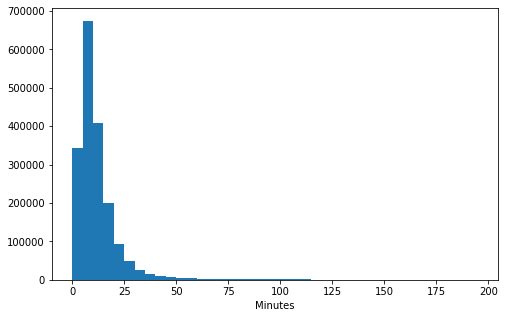

In [60]:
bin_edges = np.arange(0,200, 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins=bin_edges);
plt.xlabel('Minutes');

From the above histogram, it appears that a majority of bike rides are between 0-25 minutes. The distribution is highly skewed right, so let's do a log transformation.

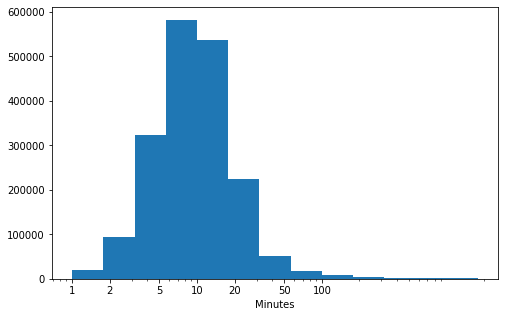

In [108]:
#transform plot with the log function
log_binsize = 0.25
bins = 10 ** np.arange(0, np.log10(df.duration_min.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100], [1,2,5,10,20,50,100])
plt.xlabel('Minutes');

The log scaling shows that most of the rides are between 5 and 10 minutes.

I would also like to take a look at the different user types. Since there are only two categories in this variable, I would like to look at the relative frequency.

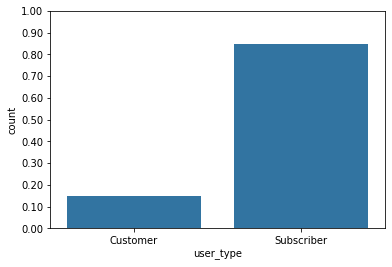

In [10]:
#create proportions to understand relative frequency
n = df.shape[0]
max_count = df.user_type.value_counts().max()
max_prop = max_count/n

tick_props = np.arange(0,max_prop+.2,0.1)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = df.user_type, color = base_color);
plt.yticks(tick_props*n,tick_names);

It appears the majority of riders are subscribers (~80%).

Next, I'd like to look at the distribution of rides throughout the year, month-by-month.

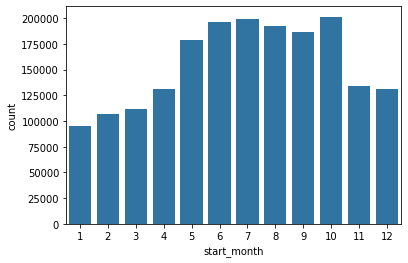

In [88]:
sb.countplot(data = df, x = 'start_month', color = base_color);

It appears the highest number of rides were taken in October. In general, it seems the summer months account for a high volume of rides while the first few months of the year, January - March, see the lowest number of rides.

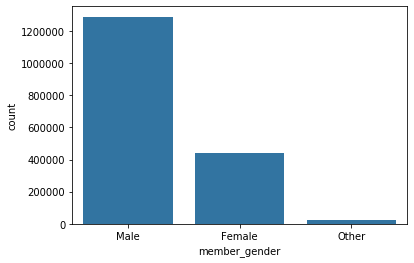

In [12]:
sb.countplot(data=df, x = 'member_gender',color = base_color);

From the above bar chart, we can see that a huge majority of users are male. Specifically, there are 3 times as many males as there are female users.

## Bivariate Exploration

The first relationship I'd like to look at is the duration of rides per month. 

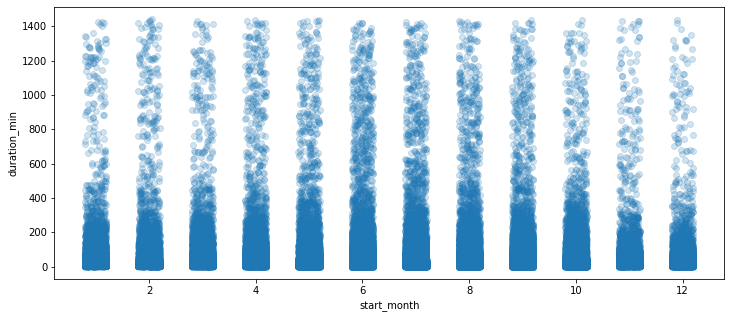

In [96]:
plt.figure(figsize = [12, 5])

sb.regplot(data = df, x = 'start_month', y = 'duration_min', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 0.2});

The above scatterplot shows that the major outliers of duration time I saw in the last section, are present in all months. However, this doesn't really give a good idea of which months have the longest rides. 

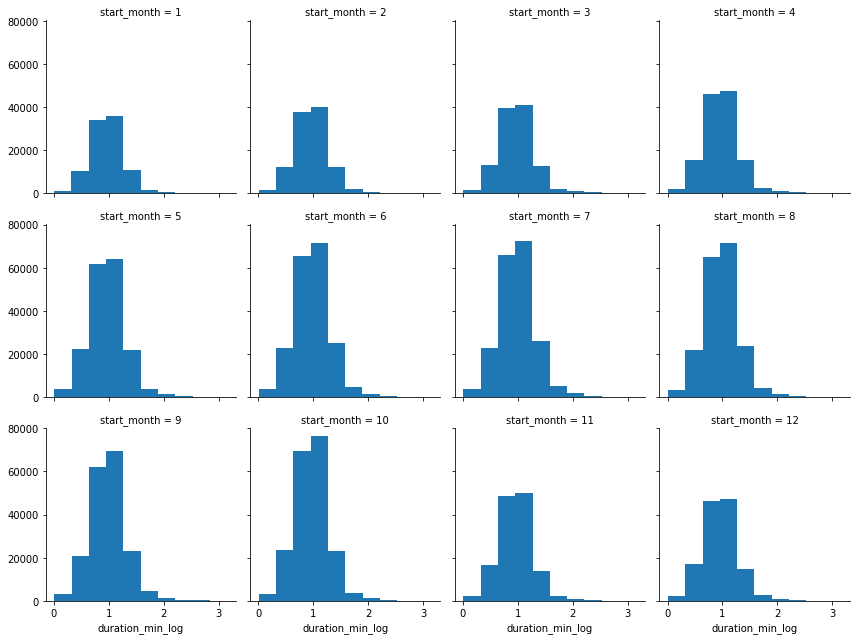

In [20]:
df['duration_min_log'] = np.log10(df['duration_min'])
g = sb.FacetGrid(data = df, col = 'start_month', col_wrap = 4);
g.map(plt.hist, 'duration_min_log');

Here we can see the mode duration times for each month much more clearly. It looks like every month, the rides stay around 10 mins and there doesn't really appear to be a relationship between duration and time of year.

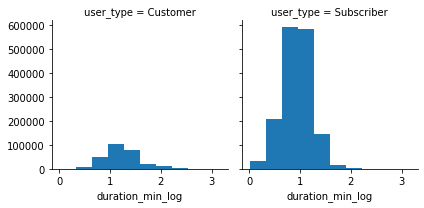

In [102]:
g = sb.FacetGrid(data = df, col = 'user_type');
g.map(plt.hist, 'duration_min_log');

Interestingly, it appears that Customers actually tend to take longer rides on average than Subscribers. This supports the intuition that, because Subscribers use the bike-sharing system much more often, they may be more likely to take shorter rides for daily trips and commutes etc. as a more frequent mode of transportation, whereas Customers may take more leisurely trips infrequently, which would be longer.

Now let's see how monthly rides are affected by user type.

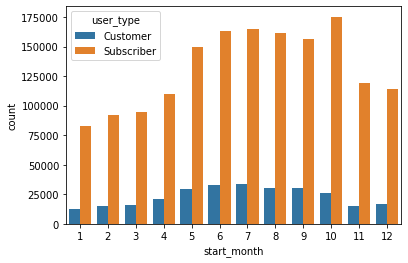

In [103]:
sb.countplot(data = df, x = 'start_month', hue = 'user_type');

This clustered bar chart demonstrates that the overall trend of number of rides per month appears to be quite similar across user types, with the highest number of rides being in the summer months and the lowest being in the beginning of the year. One observation that stands out is that October seems to be a popular riding month for *Subscribers* only, not Customers so much. For customers, the most popular month is July.

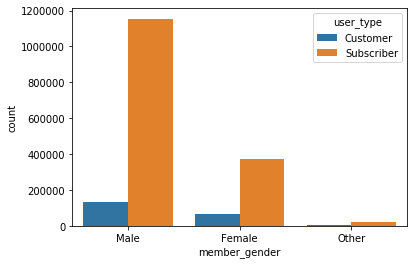

In [18]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');

Here we can see that the proportion of users that are male, female, or other gender, appears to be relatively equal across user_type.

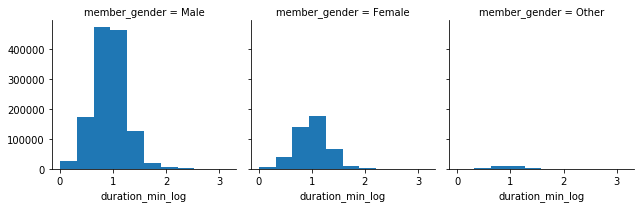

In [21]:
g = sb.FacetGrid(data = df, col = 'member_gender');
g.map(plt.hist, 'duration_min_log');

This plot indicates that the mode duration time for female riders is higher than for male riders. Male riders tend to keep their rides to less than 10 minutes whereas female riders ride for longer than 10 minutes more frequently than they do less than 10 minutes. 

## Multivariate Exploration

Now I would like to combine three variables in one plot: *duration*, *month*, and *user type*.

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 576x576 with 0 Axes>

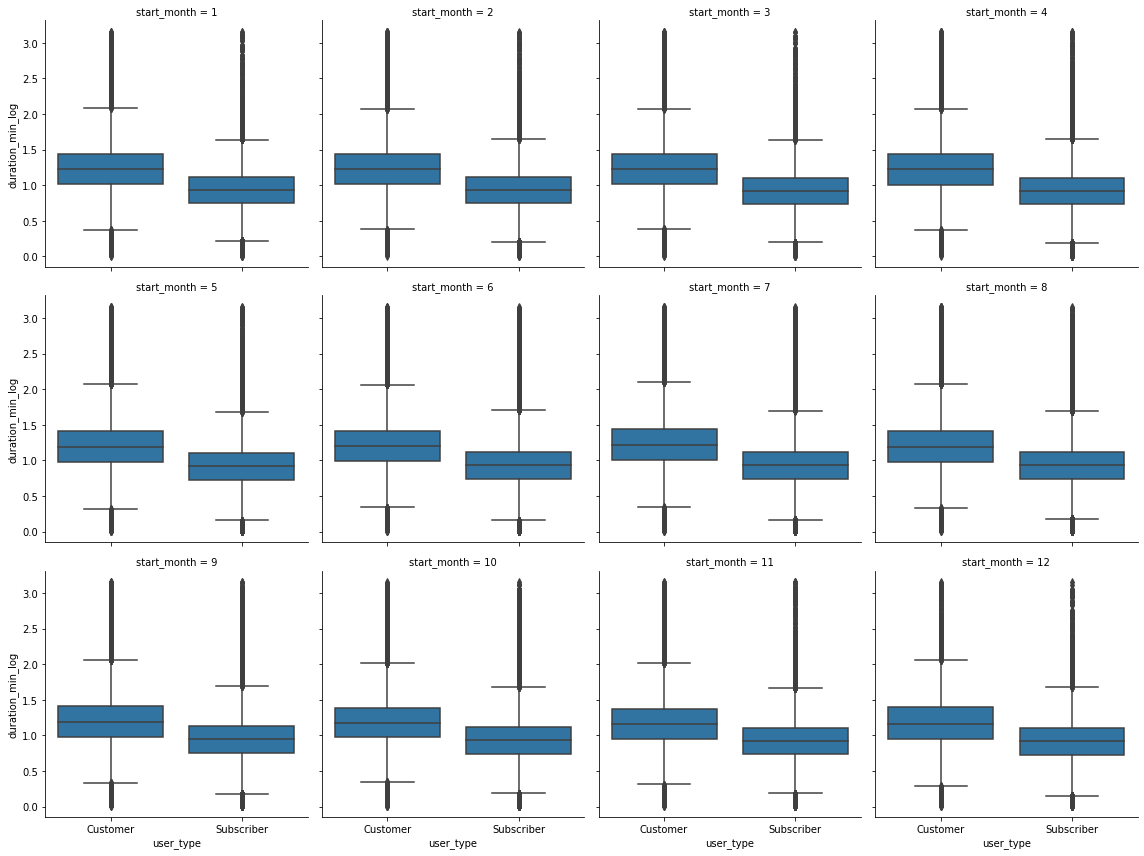

In [110]:
plt.figure(figsize=(8,8));
g = sb.FacetGrid(data = df, col = 'start_month', height = 4, col_wrap = 4);
g.map(sb.boxplot, 'user_type', 'duration_min_log');

The above grid further emphasizes the earlier finding that Customers take longer rides than Subscribers overall. Now we can see that this is true for all months of the year. 

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 576x576 with 0 Axes>

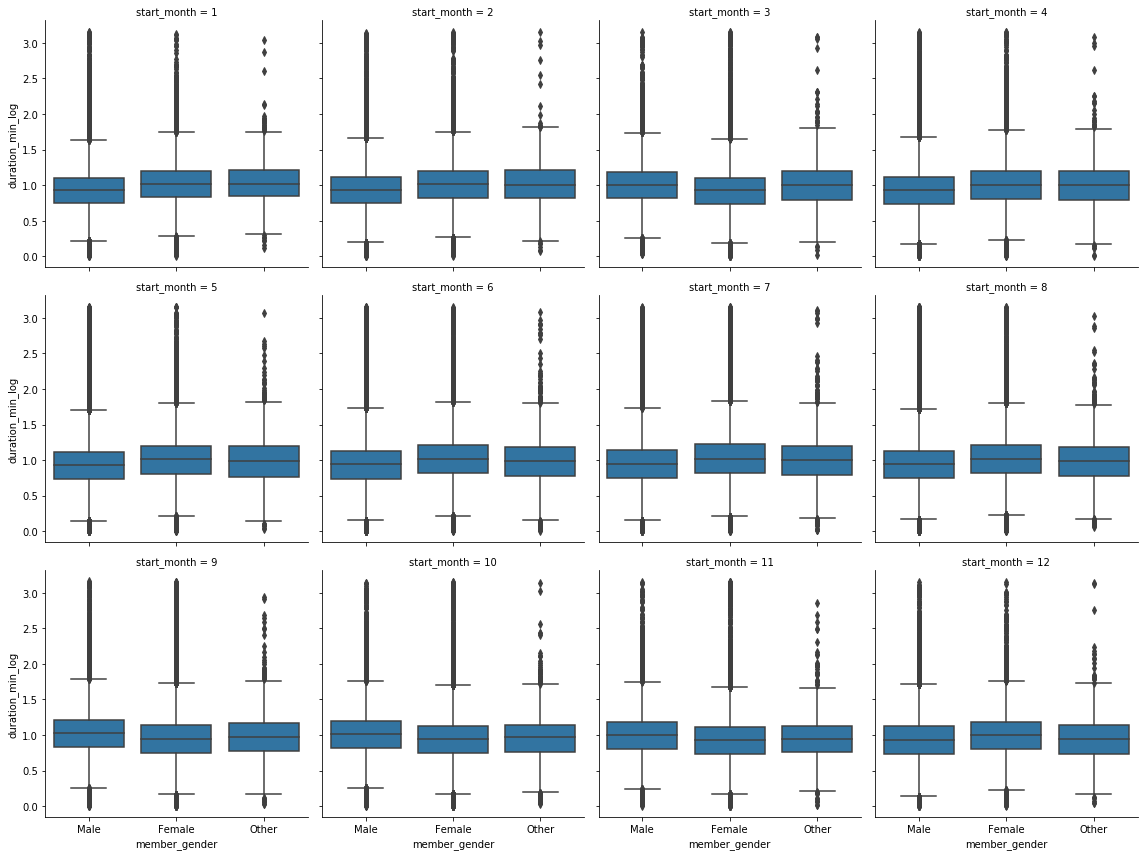

In [22]:
plt.figure(figsize=(8,8));
g = sb.FacetGrid(data = df, col = 'start_month', height = 4, col_wrap = 4);
g.map(sb.boxplot, 'member_gender', 'duration_min_log');

Relative to user type, where Customers consistently had longer duration times than Subscribers, gender seems to have less of an impact on duration time from month to month. We can see this because the boxplots for all three gender categories indicate ranges that fluctuate in relation to each other from month to month and there is no distinct pattern throughout the year. 

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


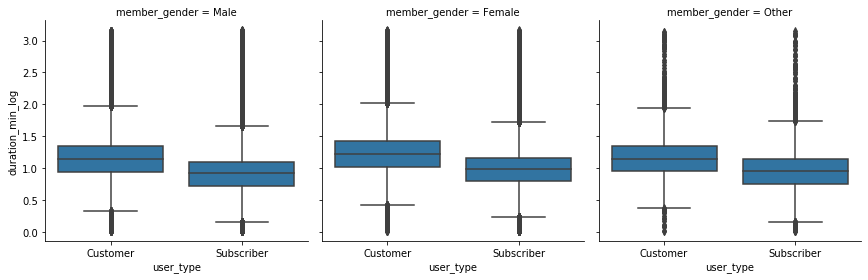

In [23]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 4, col_wrap = 4);
g.map(sb.boxplot, 'user_type', 'duration_min_log');

This plot illustrates that though duration times fluctuate from gender to gender, Customers always have longer rides than Subscribers in each gender category.